**Assignment: Data Wrangling** **Q1 Q2 & Q3**
! git clone https://github.com/ds4e/wrangling
Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.
Q1. This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)




In [72]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/ds4e/wrangling/main/assignment/data/airbnb_hw.csv'
airbnb = pd.read_csv(url1)
price = airbnb['Price']
price = price.str.replace(',','')
print( price.unique() , '\n')
price = pd.to_numeric(price,errors='coerce')
print( price.unique() , '\n')
print( 'Total missing: ', sum( price.isnull() ) )


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

I was able to clean the price variable by removing commas (resolving the issue with prices going from 999-1000), and I made sure all the values were numerical, using NaN if there were any invalid vlaues. There were no missing values after cleaning the data set.



Categorical variable: For the Minnesota police use of for data, ./data/mn_police_use_of_force.csv, clean the subject_injury variable, handling the NA's; this gives a value Yes when a person was injured by police, and No when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned subject_injury variable with the force_type variable. Are there any patterns regarding when the data are missing?

In [73]:
import pandas as pd

# Load data
url2 = 'https://raw.githubusercontent.com/ds4e/wrangling/main/assignment/data/mn_police_use_of_force.csv'
policedata = pd.read_csv(url2)

# Extract 'subject_injury' and 'force_type' columns
subject_injury = policedata['subject_injury']
force_type = policedata['force_type']

# Calculate total missing values for subject_injury and force_type
total_missing_subject = subject_injury.isnull().sum()
total_missing_force = force_type.isnull().sum()

# Calculate proportion of missing data for subject_injury
proportion_missing_subject = total_missing_subject / len(subject_injury)

# Print total and proportion of missing data for subject_injury
print('Total missing in subject_injury:', total_missing_subject)
print('Proportion missing in subject_injury:', proportion_missing_subject)

# Clean the 'subject_injury' column
subject_injury_cleaned = subject_injury.apply(lambda x: 'Yes' if pd.notnull(x) and str(x).lower() != 'no injury' else 'No')

# Assign cleaned column back to the dataframe
policedata['subject_injury_cleaned'] = subject_injury_cleaned

# Print the first few rows of cleaned data
print("\nCleaned subject_injury data (first few rows):")
print(policedata[['subject_injury_cleaned']].head(20))

#Cross Tabulate
crosstabulate = pd.crosstab(policedata['subject_injury'], policedata['force_type'], dropna=False)
print("\nCross-tabulation of 'subject_injury' with 'force_type':")
print(crosstabulate)

Total missing in subject_injury: 9848
Proportion missing in subject_injury: 0.7619342359767892

Cleaned subject_injury data (first few rows):
   subject_injury_cleaned
0                      No
1                      No
2                      No
3                      No
4                      No
5                      No
6                      No
7                      No
8                      No
9                     Yes
10                    Yes
11                    Yes
12                    Yes
13                    Yes
14                    Yes
15                    Yes
16                     No
17                     No
18                     No
19                    Yes

Cross-tabulation of 'subject_injury' with 'force_type':
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41

According to my analysis, 76.5% of the data for the subject injury variable is missing. This is highly concerning because it suggests that the majority of injuries related to police brutality are not being recorded. As a result, the overall quality of our data is significantly impacted. This missing data could introduce biases, potentially skewing the findings in either direction due to human influence on which data is reported or omitted.

When cross-tabulating this with the force type data, it appears that a higher proportion of data is missing for fields such as "bodily force" and "taser." This could be because these force types are associated with more severe actions and greater liability for police officers, which might explain why the data is less likely to be reported. This lack of data raises serious concerns and could undermine the integrity of any conclusions drawn from this dataset.

3. Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.

In [74]:
import pandas as pd
import numpy as np

# Load data
pretrialurl = 'https://github.com/DS3001/wrangling/raw/refs/heads/main/data/justice_data.parquet'
pretrial = pd.read_parquet(pretrialurl, engine='pyarrow')
pretrial.head()
defendentreleased = pretrial['WhetherDefendantWasReleasedPretrial']
print(defendentreleased.value_counts())
#It appears that the "9" value is unclear. Let's repace this with "missing value"
defendentreleased = defendentreleased.replace(9, np.nan)
print(defendentreleased.value_counts(), '\n')
missing = sum(defendentreleased.isnull())
print(f"Total missing values: {missing}")


WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64 

Total missing values: 31


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

In [75]:
import pandas as pd
import numpy as np

sentence_col = pretrial['ImposedSentenceAllChargeInContactEvent']  # sentence length
sentence_type_col = pretrial['SentenceTypeAllChargesAtConvictionInContactEvent']  # sentence type

# Convert the 'sentence_col' to numeric and coerce invalid entries to NaN
sentence_col = pd.to_numeric(sentence_col, errors='coerce')

# Count missing values in 'sentence_col'
missing_length = sum(sentence_col.isnull())
print(f"Total missing values in 'ImposedSentenceAllChargeInContactEvent': {missing_length}\n")

# Cross-tabulate missing values in 'sentence_col' with 'sentence_type_col'
sentence_na = sentence_col.isnull()
print("Cross-tabulation of missing sentence data by sentence type:")
print(pd.crosstab(sentence_na, sentence_type_col), '\n')

# Handle specific cases where the sentence type is 4 (dismissed) or 9
sentence_col = sentence_col.mask(sentence_type_col == 4, 0)  # Assign 0 where sentence type is 4 (dismissed charges)
sentence_col = sentence_col.mask(sentence_type_col == 9, np.nan)  # Replace with NaN where sentence type is 9 (unclear)

# Recalculate missing values after masking
sentence_na_after = sentence_col.isnull()
print("Cross-tabulation after replacing specific values (type 4 = 0, type 9 = NaN):")
print(pd.crosstab(sentence_na_after, sentence_type_col), '\n')

# Final check on missing values after cleaning
missing_after_cleaning = sum(sentence_col.isnull())
print(f"Total missing values after cleaning: {missing_after_cleaning}\n")


Total missing values in 'ImposedSentenceAllChargeInContactEvent': 9053

Cross-tabulation of missing sentence data by sentence type:
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274 

Cross-tabulation after replacing specific values (type 4 = 0, type 9 = NaN):
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
ImposedSentenceAllChargeInContactEvent                                      
False                                             8720  4299  914  8779    0
True                                                 0     0    0     0  274 

Total missing values after cleaning: 274




To clean the ImposedSentenceAllChargeInContactEvent variable, I first converted it to numeric values, coercing any non-numeric values to NaN for consistency. Then I identified and counted missing values. For special cases, I handled rows where the SentenceTypeAllChargesAtConvictionInContactEvent column was 4 (dismissed charges), setting the sentence value to 0, as no sentence was imposed in those cases. For rows where the type was 9 (unclear), I replaced the value with NaN, as these entries lacked sufficient information. I ended up with 274 missing values after cleaning this data set.

Q2. Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

Open the shark attack file using Pandas. It is probably not a csv file, so read_csv won't work.

In [2]:
import pandas as pd


url = "https://github.com/ds4e/wrangling/raw/main/data/GSAF5.xls"
sharkdata = pd.read_excel(url)

Drop any columns that do not contain data.

In [3]:
import pandas as pd

# GitHub raw file link
url3 = "https://github.com/ds4e/wrangling/raw/main/data/GSAF5.xls"

# Read the Excel file into a pandas DataFrame
sharkdataraw = pd.read_excel(url)

index_to_drop_after = 15

sharkdata = sharkdata.iloc[:, :index_to_drop_after]

sharkdata.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,Injuries to stomach preventing attack on friend,N,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,Entire calf muscle removed and bitten both arm...,Y,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...


Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

After analysing this data, it appears that the shark attacks are increasing over time.

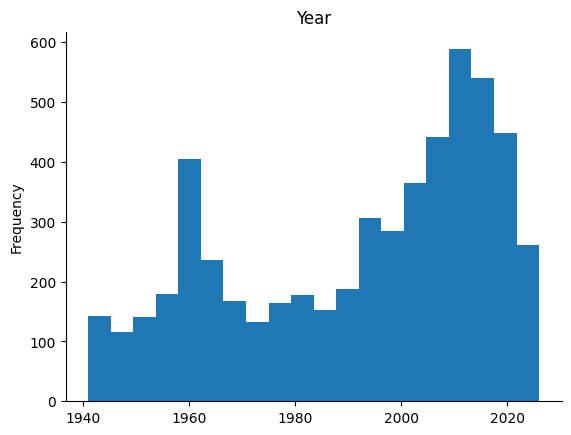

In [78]:
# Filter the data and assign it to a new DataFrame
sharkdataupdated = sharkdata[sharkdata['Year'] > 1940].copy()

# Now safely modify the 'Year' column using .loc
sharkdataupdated.loc[:, 'Year'] = sharkdataupdated['Year'].astype(int)

# Plot the histogram of 'Year'
from matplotlib import pyplot as plt
sharkdataupdated['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)



Clean the Age variable and make a histogram of the ages of the victims.


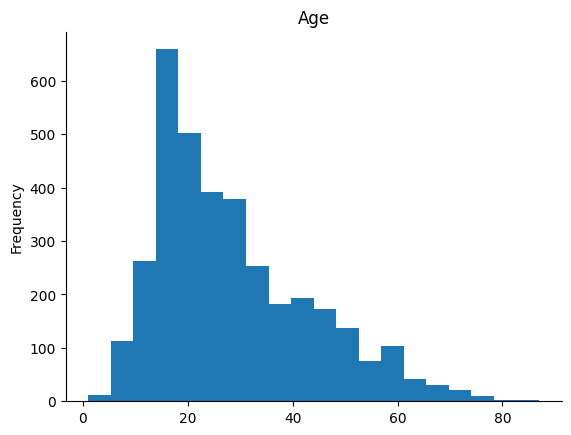

In [80]:
sharkdataupdated['Age'] = pd.to_numeric(sharkdataupdated['Age'], errors='coerce')
sharkdataupdated1 = sharkdataupdated.dropna(subset=['Age'])
sharkdataupdated1.loc[:, 'Age'] = sharkdataupdated1['Age'].astype(int)
sharkdataupdated1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)


What proportion of victims are male?

In [81]:
import pandas as pd
# Filter to only include male victims and calculate the proportion
male_victims = sharkdataupdated1[sharkdataupdated1['Sex'] == 'M']  # Adjust 'sex' if needed
proportion_male = len(male_victims) /sharkdataupdated1.shape[0]

# Display the proportion of male victims
print(f"Proportion of victims that are male: {proportion_male:.2f}")


Proportion of victims that are male: 0.84


Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [87]:
# Clean the 'Type' column by normalizing its values to three categories
sharkdata['Type'] = sharkdata['Type'].replace({
    'Provoked attack': 'Provoked',
    'Unprovoked attack': 'Unprovoked',
    'Unknown': 'Unknown',  # Assuming 'Unknown' is already in the correct form
    'Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked'
})

# Calculate the proportion of unprovoked attacks
unprovoked_attacks = sharkdata[sharkdata['Type'] == 'Unprovoked']
proportion_unprovoked = len(unprovoked_attacks) / sharkdata.shape[0]

# Display the proportion of unprovoked attacks
print(f"Proportion of attacks that are unprovoked: {proportion_unprovoked:.2f}")


Proportion of attacks that are unprovoked: 0.74


Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

In [89]:
# Clean the 'Fatal Y/N' column: Keep 'Y' and 'N', replace all others with 'Unknown'
sharkdata['Fatal Y/N'] = sharkdata['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')

# Display the cleaned 'Fatal Y/N' column
print(sharkdata['Fatal Y/N'].value_counts())


Fatal Y/N
N          4870
Y          1468
Unknown     652
Name: count, dtype: int64


Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [11]:
import pandas as pd

# Clean the 'Fatal Y/N' column: Keep 'Y' and 'N', replace all others with 'Unknown'
sharkdata['Fatal Y/N'] = sharkdata['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')

# Clean the 'Type' column to only have 'Provoked', 'Unprovoked', and 'Unknown'
sharkdata['Type'] = sharkdata['Type'].apply(lambda x: x if x in ['Provoked', 'Unprovoked', 'Unknown'] else 'Unknown')

# Question 1: Are sharks more likely to launch unprovoked attacks on men or women?
unprovoked_attacks = sharkdata[sharkdata['Type'] == 'Unprovoked']
unprovoked_by_gender = unprovoked_attacks['Sex'].value_counts()

# Find the gender with more unprovoked attacks
dominant_gender = unprovoked_by_gender.idxmax()  # Get the gender with more attacks
dominant_gender_count = unprovoked_by_gender.max()  # Get the count for the dominant gender

# Display the gender with more unprovoked attacks
print(f"The gender with more unprovoked attacks is {dominant_gender} with {dominant_gender_count} attacks.")

The gender with more unprovoked attacks is M with 4309 attacks.


In [ ]:
# Clean the 'Fatal Y/N' column: Keep 'Y' and 'N', replace all others with 'Unknown'
sharkdata['Fatal Y/N'] = sharkdata['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')

# Clean the 'Type' column to only have 'Provoked', 'Unprovoked', and 'Unknown'
sharkdata['Type'] = sharkdata['Type'].apply(lambda x: x if x in ['Provoked', 'Unprovoked', 'Unknown'] else 'Unknown')

# Filter rows where 'Fatal Y/N' is 'Y' (fatal attacks)
fatal_attacks = sharkdata[sharkdata['Fatal Y/N'] == 'Y']

# Count the number of fatal attacks by type (provoked vs unprovoked)
fatal_attacks_by_type = fatal_attacks['Type'].value_counts()

# Determine which type (provoked or unprovoked) is more likely to be fatal
total_attacks_by_type = sharkdata['Type'].value_counts()
fatality_rate_by_type = fatal_attacks_by_type / total_attacks_by_type


# Determine which type is more likely to be fatal
most_fatal_type = fatality_rate_by_type.idxmax()
print(f"The attack type more likely to be fatal is: {most_fatal_type}")


The attack type more likely to be fatal is: Unprovoked


In [ ]:

# Clean the 'Fatal Y/N' column: Keep 'Y' and 'N', replace all others with 'Unknown'
sharkdata['Fatal Y/N'] = sharkdata['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')

# Clean the 'Type' column to only have 'Provoked', 'Unprovoked', and 'Unknown'
sharkdata['Type'] = sharkdata['Type'].apply(lambda x: x if x in ['Provoked', 'Unprovoked', 'Unknown'] else 'Unknown')

# Filter rows where 'Fatal Y/N' is 'Y' (fatal attacks)
fatal_attacks = sharkdata[sharkdata['Fatal Y/N'] == 'Y']

# Count the number of fatal attacks by gender
fatal_attacks_by_gender = fatal_attacks['Sex'].value_counts()

# Determine which gender has more fatal attacks
most_fatal_gender = fatal_attacks_by_gender.idxmax()
print(f"The gender with the most fatal attacks is: {most_fatal_gender}")

The gender with the most fatal attacks is: M


What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

In [15]:
# Normalize the 'Species' column (convert to lowercase, remove extra spaces)
sharkdata['Species '] = sharkdata['Species '].astype(str).str.lower().str.replace(r'\s+', ' ').str.strip()

# Count how many times "white shark" appears in the 'Species' column
white_shark_count = sharkdata['Species '].str.contains(r'white shark', na=False).sum()

# Calculate the proportion of white shark attacks (as a decimal)
proportion_white_shark = white_shark_count / sharkdata.shape[0]

# Display the proportion as a percentage and as a decimal
print(f"The proportion of white shark attacks is {proportion_white_shark:.4f} (or {proportion_white_shark * 100:.2f}%).")


The proportion of white shark attacks is 0.1001 (or 10.01%).


Q3. Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.
**Read the abstract. What is this paper about?**

It seems that this paper emphasizes the importance of cleaning data, as clean data is not only easier to work with and manipulate but also enhances accuracy, reduces errors, and ensures more reliable insights.

**Read the introduction. What is the "tidy data standard" intended to accomplish?**

The "tidy data standard" is intended to provide a consistent/structured way to organise data. It makes the process of cleaning data more efficient and eliminates the need to start from scratch each time. As a result, less time is spent translating data between different tools. It allows data scientists to focus their time on solving domain-specific problems instead of logistical issues related to data formatting.

**Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.**

The sentence “Like families, tidy datasets are all alike but every messy dataset is messy in its own way” compares datasets to families. It implies that once data is organized following the tidy standard—where each variable is in its own column and each observation is in its own row—the resulting structure is consistent and predictable. In contrast, messy datasets can deviate in countless unique ways from this ideal form, making them harder to work with.

The second sentence, “For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general,” points out that although one can often intuitively distinguish observations from variables when looking at a single dataset, developing a universal and precise definition for what counts as a variable or an observation is challenging.

**Read Section 2.2. How does Wickham define values, variables, and observations?**


Wickman explains that a dataset is a collection of individual values- either numbers or strings that are organised in two ways. Each value belongs to a variable- a set of all values measuring the same underlying attribute across different units. Each value is also part of a larger "observation"- which is a collection of all values on the same unit across various attributes. This dual organisation system is the basis of the tidy data framework, since each value is part of both a variable and an observation, making the data easier to manipulate.



**How is "Tidy Data" defined in section 2.3?**


Wickham defines tidy data as a standardized mapping of a dataset’s meaning. In this framework, a dataset is considered tidy if it satisfies three conditions:

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

This structure ensures that the values belonging to a single variable are kept together and that data for each observation are paired across the different variables. This makes it easier to analyze and manipulate the data.

**Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**


The five most common issues are:

a. Column headers are values, not variable names.
b. Multiple variables are stored in one column.
c. Variables are stored in both rows and columns.
d. Multiple types of observational units are stored in the same table.
e. A single observational unit is stored in multiple tables.

Table 4 presents data on income and religion. Instead of having a separate column that clearly defines the income variable, the income groups (e.g. "<$10k", "$10-20k", etc.) are column headers. Tidy datasets should have variable names as the header. The current arrangement makes it difficult to extract the income data because the income levels are embedded in the table’s structure.

Melting is the process of transforming a dataset from a wide format into a long (or “molten”) format. In this context, melting takes the columns that currently hold data values (in Table 4, the various income groups) and stacks them into two new columns: 1) A key column that contains what was previously the header name, and 2) a value column that holds the corresponding data values. This helps in making the data more consistent.

**Why, specifically, is table 11 messy but table 12 tidy and "molten"?**

In table 11, the data is organised by the days of the month. Each day has its own column. This is messy as the column headers should be names instaed. Table 12 is tidy and "molten" because the column header name is "date" and the data is sorted into the column. This makes it much easier to compare the data between the various days.

**Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?**

Wickman is saying that tidy data is only as helpful as the tools built for it, and most tools are designed for tidy data. This locks/limits data scientists into a predicament. You need tidy data to effectively use the tools we currently developed, but those tools are dependent on having clean data in the first place. He hopes that this might change in the future with more innovation.